In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

데이터를 훈련 세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 반환한다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

최근접 이웃 개수를 3으로 하는 모델 훈련

In [ ]:
print(knr.predict([[50]]))

[1000.]


길이가 50cm인 농어의 무게 예측 -> 실제는 결과보다 무게가 더 많이 나감

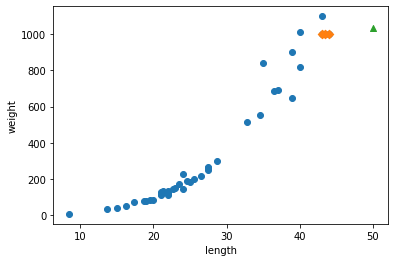

In [ ]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 50cm, 무게 1g 인 농어 ^로 표현
그 주변 샘플 주황색 마름모

산점도를 통해 길이가 커질수록 농어의 무게가 증가하는 경향이 있음.

50cm 농어에서 가장 가까운 것은 45cm 근방 이기 때문에, k-최근접 이웃 알고리즘은 이 샘플들의 무게를 평균한다.

In [ ]:
print(np.mean(train_target[indexes]))

print(knr.predict([[100]]))

1000.0
[1000.]


모델이 예측한 값과 일치함.


**k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균냄**
-> 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측하기도 함

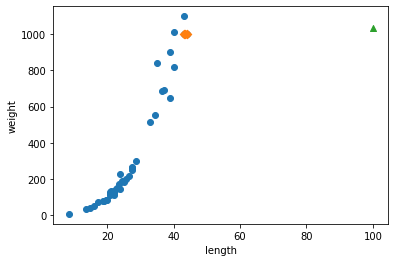

In [ ]:
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

타깃을 평균 내기 때문에 농어의 크기가 100cm어도 20-40cm와 동일한 무게를 갖는 것을 볼 수 있음.

**k-최근접 이웃을 사용해 이러한 문제를 해결하기 위해서는 훈련 세트를 다시 만들어야 한다.**

머신러닝 모델은 주기적으로 훈련해야 한다.